# ThinkDSP

This notebook contains an exercise I removed from Chapter 9 because I think it was more confusing than useful.

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

# suppress division by zero warning
from warnings import simplefilter
simplefilter('ignore', RuntimeWarning)

PI2 = 2 * np.pi
GRAY = '0.7'

**Exercise:** In the section on cumulative sum, I mentioned that some of the examples don't work with non-periodic signals.  Try replacing the sawtooth wave, which is periodic, with the Facebook stock price data, which is not, and see what goes wrong.

I think there are actually two problems: the input signal is biased and it's non-periodic.

*Solution:* I'll start by loading the Facebook data again.

In [2]:
names = ['date', 'open', 'high', 'low', 'close', 'volume']
df = pd.read_csv('fb.csv', header=0, names=names, parse_dates=[0])
ys = df.close.values[::-1]

And making a Wave

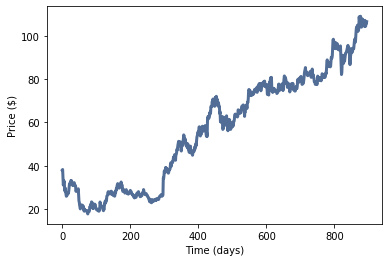

In [3]:
close = thinkdsp.Wave(ys, framerate=1)
close.plot()
thinkplot.config(xlabel='Time (days)', ylabel='Price ($)')

I'll compute the daily changes using `Wave.diff`:

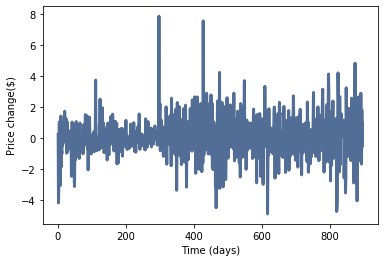

In [4]:
change = close.diff()
change.plot()
thinkplot.config(xlabel='Time (days)', ylabel='Price change($)')

Now I'll run the `cumsum` example using `change` as the input wave.

Note: Try this with and without unbiasing.

In [5]:
in_wave = change.copy()
# in_wave.unbias()

Here's the spectrum before the cumulative sum:

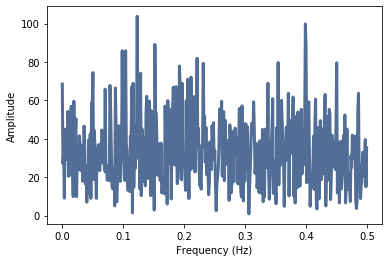

In [6]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

The output wave is the cumulative sum of the input

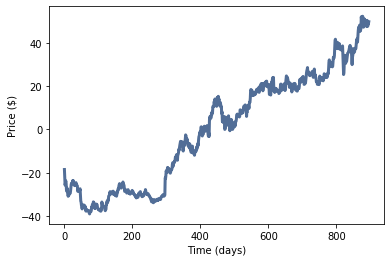

In [7]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
thinkplot.config(xlabel='Time (days)', ylabel='Price ($)')

And here's its spectrum

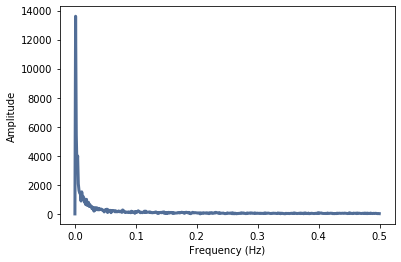

In [8]:
out_spectrum = out_wave.make_spectrum()
out_spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

Now we compute the ratio of the output to the input:

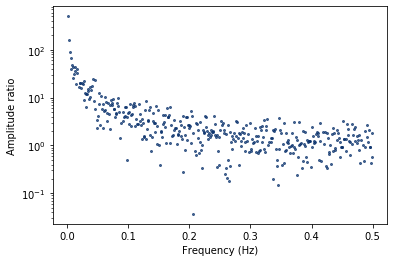

In [9]:
ratio_spectrum = out_spectrum.ratio(in_spectrum, thresh=10)
ratio_spectrum.hs[0] = np.inf
ratio_spectrum.plot(style='.', markersize=4)

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 yscale='log')

We can compare them with the cumsum filter:

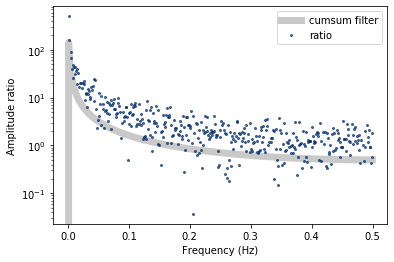

In [10]:
diff_window = np.array([1.0, -1.0])
padded = thinkdsp.zero_pad(diff_window, len(in_wave))
diff_wave = thinkdsp.Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

cumsum_filter = diff_filter.copy()
cumsum_filter.hs = 1 / cumsum_filter.hs
cumsum_filter.hs[0] = 0
cumsum_filter.plot(label='cumsum filter', color=GRAY, linewidth=7)

ratio_spectrum.plot(label='ratio', style='.', markersize=4)
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 yscale='log')

The ratios follow the shape of the filter.

Now we can compute the output wave using the convolution theorem, and compare the results:

In [11]:
len(in_spectrum), len(cumsum_filter)

(448, 448)

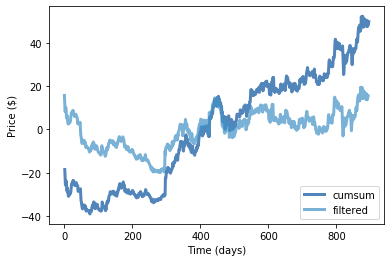

In [12]:
thinkplot.preplot(2)

out_wave.plot(label='cumsum')

in_spectrum = in_wave.make_spectrum()
out_wave2 = (in_spectrum * cumsum_filter).make_wave()
out_wave2.plot(label='filtered')

thinkplot.config(loc='lower right')
thinkplot.config(xlabel='Time (days)', ylabel='Price ($)')

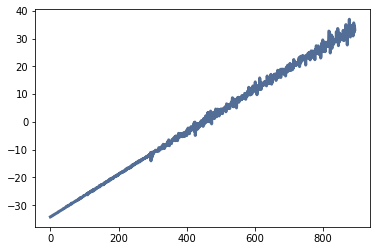

In [13]:
diff = out_wave.ys[:-1] - out_wave2.ys
thinkplot.plot(diff)